# Neural & Behavioral Modeling - Week 1 (Exercises)
by 李采蓉 b08207042@ntu.edu.tw

In [1]:
%config IPCompleter.greedy=True 
%matplotlib inline
from numpy import *
from matplotlib.pyplot import *
from IPython.display import *

## 1 Party Simulation (5 points)
This is a model of a cocktail party. The men and women at the party form groups. A party-goer becomes uncomfortable and switches groups if their current group has too many members of the opposite sex.

### 1.1 Insert your codes to complete the simulation (2 points)

**思路**：
+ 找出unhappy組別
+ 找出多數
+ 確認多數是否大於tolerance
    + 如果大於，對少數施用Person.leave()
    + 如果小於等於，計入Nhappy人數中

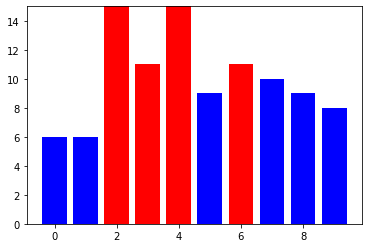

In [52]:
# Model parameters:
Ngroups=10
Npeople=100  
Tolerance=.25 # tolerable propotion of the opposite sex

# Supporting functions:
class Person:
    def __init__(self, Ngroups):
        self.sex = random.randint(2) # 0=woman; 1=man
        self.Ngroups=Ngroups
        self.group = random.randint(Ngroups) # staying in which group?
        
    def leave(self):
        options=delete(arange(self.Ngroups),self.group) # except the current group
        self.group = int(random.choice(options,1)) # choosing a new group
    
def party_stats(people): # calculate the number of men & women in each group
    Npeople=len(people)
    sexes=[people[i].sex for i in range(Npeople)]
    groups=[people[i].group for i in range(Npeople)]
    counts=zeros((max(groups)+1,max(sexes)+1))
    # counts=[[女, 男]*10] (人數)
    proportions=counts.copy()
    for p in range(Npeople):
        counts[groups[p],sexes[p]]+=1
        # p在第幾組、什麼性別，該位置+1
    men_plus_women=sum(counts,1) # number of men and women in each group
    men_plus_women[men_plus_women==0]=inf # to avoid "dividing by zeros later
    proportions[:,0]=counts[:,0]/men_plus_women # proportion of women in each group
    proportions[:,1]=counts[:,1]/men_plus_women # proportion of men in each group
    # proportions=[[女, 男]*10] (比例)
    return counts, proportions# size=group*sex

def plot_party(counts):
    x=arange(10) # number of groups
    clf() # clear previous figure
    bar(x, counts[:,0], color = 'r') # women
    bar(x, counts[:,1], color = 'b', bottom = counts[:,0]) # men on top of women in the plot
    display(gcf()); clear_output(wait=True) # to allow dynamic plots
    
# Initialization:
people = [Person(Ngroups) for i in range(Npeople)] # 初始設定每個人的性別、組別
Nhappy=0 # 滿意組內狀況人數

# Simulation:
while(Nhappy<Npeople): # Nhappy人數等於Npeople時會停下
    Nhappy=0 # recounting after a new move
    # Insert your codes here to make everyone happy:
    # people = [Person(Ngroups) for i in range(Npeople)] # !! Remove this line !!
    counts, proportions=party_stats(people) # size=group*sex
    # Plot new results:
    plot_party(counts)
    for i in range(10): # 十組
        # 找出哪個性別在組中佔多數
        if(proportions[i][0]>proportions[i][1]):
            majsex = 0
        else: majsex = 1
        
        # 如果占多數的性別其組內比例超過tolerance，將組內占少數性別的人分散到其他組(leave())
        if(proportions[i][majsex] > Tolerance and proportions[i][majsex]!=1):
            for j in range(Npeople):
                if(people[j].sex != majsex and people[j].group == i):
                    people[j].leave()                   
        # 全組相安無事，組內人數計入Nhappy中
        else:
            Nhappy+=(counts[i][0]+counts[i][1])
counts, proportions=party_stats(people)
plot_party(counts)

### 1.2 Modify the three model parameters & discuss how each affects your simulations (2 points)

**調整的參數**：
1. Tolerance(忍受值)
2. Category number(性別的種類)
3. Ngroups & Npeople(組別數量與人數)

#### 1. Tolerance diff
##### Trial 1-1
Tolerance=0.5

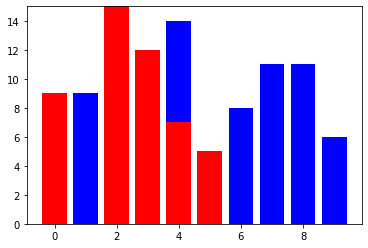

In [59]:
# Model parameters:
Ngroups=10
Npeople=100  
Tolerance=.5 # tolerable propotion of the opposite sex

# Initialization:
people = [Person(Ngroups) for i in range(Npeople)] # 初始設定每個人的性別、組別
Nhappy=0 # 滿意組內狀況人數

# Simulation:
while(Nhappy<Npeople): # Simulation stops when everyone is happy
    Nhappy=0 # recounting after a new move
    counts, proportions=party_stats(people) # size=group*sex
    plot_party(counts)
    for i in range(10):
        if(proportions[i][0]>proportions[i][1]):
            majsex = 0
        else: majsex = 1
        if(proportions[i][majsex] > Tolerance and proportions[i][majsex]!=1):
            for j in range(Npeople):
                if(people[j].sex != majsex and people[j].group == i):
                    people[j].leave()
        else: Nhappy+=(counts[i][0]+counts[i][1])
counts, proportions=party_stats(people)
plot_party(counts)

##### Trial 1-2
Tolerance=0.75

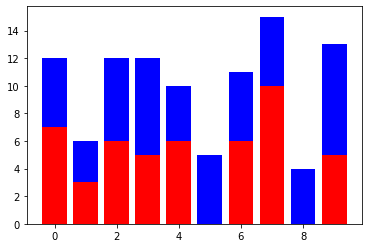

In [56]:
# Model parameters:
Ngroups=10
Npeople=100  
Tolerance=.75 # tolerable propotion of the opposite sex

# Initialization:
people = [Person(Ngroups) for i in range(Npeople)] # 初始設定每個人的性別、組別
Nhappy=0 # 滿意組內狀況人數

# Simulation:
while(Nhappy<Npeople): # Simulation stops when everyone is happy
    Nhappy=0 # recounting after a new move
    counts, proportions=party_stats(people) # size=group*sex
    plot_party(counts)
    for i in range(10):
        if(proportions[i][0]>proportions[i][1]):
            majsex = 0
        else: majsex = 1
        if(proportions[i][majsex] > Tolerance and proportions[i][majsex]!=1):
            for j in range(Npeople):
                if(people[j].sex != majsex and people[j].group == i):
                    people[j].leave()
        else: Nhappy+=(counts[i][0]+counts[i][1])
counts, proportions=party_stats(people)
plot_party(counts)

**結果討論**：<br>
在tolerance=0.25時，十組皆呈現單一色彩；在tolerance=0.5的情況開始出現同組內有兩種顏色的情況(不過很少)；在tolerance=0.75時可以明顯看到同組內兩性別共容的組別變多了。

這是由於題目規定當組內佔多數的性別其比例超過tolerance時，佔少數性別的人士會被打散離開到別組去，而在二元性別的情況下所規範的「多數」，其意涵必為「大於50%」，這也就意味著假設今天的tolerance設定小於0.5，無論如何到最後各組內僅會剩下一種性別的人(組內少數都會被趕走)。這樣的解釋也予以上模擬相符，並且在tolerance=0.5時可以驚喜地發現出現共容(male proportion=0.5, female proportion=0.5)的情形，而共容也會因tolerance的增長使容忍範圍拉寬而有所增加，直至tolerance=0.75可以看到相比於tolerance=0.5有更多的共容組別。

- 0 <= tolerance < 1/2 : 各組皆為單一性別
- 1/2 <= tolerance : 單一性別和共容組別皆有出現

---
#### 2. Category diff
**思路**：
+ 多劃分一種第三性，將Person多設一種性別(2)
+ party_stats需多設一類proportion
+ plot_party需新增屬於others的顏色，以及調整其底下預留的高度(男+女)
+ 迴圈內設定假若一組中占比最大的族群，若其比例大於tolerance，較小的兩族群便無法在組內繼續待下去
+ 假若有兩組佔比最大族群，若其比例大於tolerance，較小的族群便無法在組內繼續待下去
+ 如果三族群組內人數相同，若其比例大於tolerance，全部的族群皆無法在組內繼續待下去

##### Trial 2-1
Category num=3<br>
Tolerance=0.25

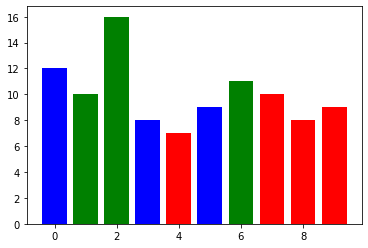

In [28]:
# Model parameters:
Ngroups=10
Npeople=100  
Tolerance=.25 # tolerable propotion of the opposite sex

# Supporting functions:
class Person:
    def __init__(self, Ngroups):
        self.sex = random.randint(3) # 0=woman; 1=man; 2=others
        self.Ngroups=Ngroups
        self.group = random.randint(Ngroups) # staying in which group?
        
    def leave(self):
        options=delete(arange(self.Ngroups),self.group) # except the current group
        self.group = int(random.choice(options,1)) # choosing a new group
    
def party_stats(people): # calculate the number of men & women in each group
    Npeople=len(people)
    sexes=[people[i].sex for i in range(Npeople)]
    groups=[people[i].group for i in range(Npeople)]
    counts=zeros((max(groups)+1,max(sexes)+1))
    # counts=[[女, 男, 其他]*10] (人數)
    proportions=counts.copy()
    for p in range(Npeople):
        counts[groups[p],sexes[p]]+=1
        # p在第幾組、什麼性別，該位置+1
    all_people=sum(counts,1) # number of men and women in each group
    all_people[all_people==0]=inf # to avoid "dividing by zeros later
    proportions[:,0]=counts[:,0]/all_people # proportion of women in each group
    proportions[:,1]=counts[:,1]/all_people # proportion of men in each group
    proportions[:,2]=counts[:,2]/all_people # proportion of others in each group
    # proportions=[[女, 男, 其他]*10] (比例)
    return counts, proportions# size=group*sex

def plot_party(counts):
    x=arange(10) # number of groups
    clf() # clear previous figure
    bar(x, counts[:,0], color = 'r') # women
    bar(x, counts[:,1], color = 'b', bottom = counts[:,0]) # men on top of women in the plot
    bar(x, counts[:,2], color = 'g', bottom = counts[:,0]+counts[:,1]) # men on top of women in the plot
    display(gcf()); clear_output(wait=True) # to allow dynamic plots
    
# Initialization:
people = [Person(Ngroups) for i in range(Npeople)] # assign each person to a group
# 初始設定每個人的性別、組別
Nhappy=0 # Number of happy people
# 滿意組內狀況人數

# Simulation:
while(Nhappy<Npeople): # Simulation stops when everyone is happy
    Nhappy=0 # recounting after a new move
    # Insert your codes here to make everyone happy:
    counts, proportions=party_stats(people) # size=group*sex
    # Plot new results:
    plot_party(counts)
    
    for i in range(10):
        majsex2 = 3
        # 三個人數一樣多
        if(proportions[i][0]==proportions[i][1] and proportions[i][0]==proportions[i][2]): majsex = 3
        # 有一個最多
        elif(max(proportions[i][0], proportions[i][1], proportions[i][2])==proportions[i][0]):
            majsex = 0
            # 還是兩個最多
            if(proportions[i][0]==proportions[i][1]): majsex2 = 1
            elif(proportions[i][0]==proportions[i][2]): majsex2 = 2
        elif(max(proportions[i][0], proportions[i][1], proportions[i][2])==proportions[i][1]):
            majsex = 1
            if(proportions[i][1]==proportions[i][2]): majsex2 = 2
        elif(max(proportions[i][0], proportions[i][1], proportions[i][2])==proportions[i][2]):
            majsex = 2
        
        if(majsex==3 and proportions[i][0]> Tolerance):
            for j in range(Npeople):
                if(people[j].group==i):
                    people[j].leave()
        elif(majsex != 3 and proportions[i][majsex]> Tolerance and proportions[i][majsex]!=1):
            for j in range(Npeople):
                if(people[j].sex != majsex and people[j].sex != majsex2 and people[j].group == i):
                    people[j].leave()
        else: Nhappy+=(counts[i][0]+counts[i][1]+counts[i][2])
counts, proportions=party_stats(people)
plot_party(counts)

##### Trial 2-2
Category num=3<br>
Tolerance=0.4

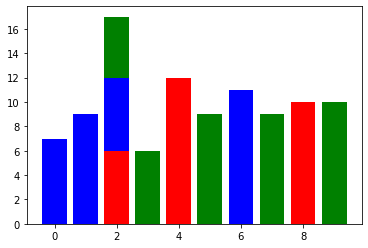

In [41]:
# Model parameters:
Ngroups=10
Npeople=100  
Tolerance=0.4 # tolerable propotion of the opposite sex

# Initialization:
people = [Person(Ngroups) for i in range(Npeople)] # 初始設定每個人的性別、組別
Nhappy=0 # 滿意組內狀況人數

# Simulation:
while(Nhappy<Npeople): # Simulation stops when everyone is happy
    Nhappy=0 # recounting after a new move
    # Insert your codes here to make everyone happy:
    counts, proportions=party_stats(people) # size=group*sex
    # Plot new results:
    plot_party(counts)
    
    for i in range(10):
        majsex2 = 3
        # 三個人數一樣多
        if(proportions[i][0]==proportions[i][1] and proportions[i][0]==proportions[i][2]): majsex = 3
        # 有一個最多
        elif(max(proportions[i][0], proportions[i][1], proportions[i][2])==proportions[i][0]):
            majsex = 0
            # 還是兩個最多
            if(proportions[i][0]==proportions[i][1]): majsex2 = 1
            elif(proportions[i][0]==proportions[i][2]): majsex2 = 2
        elif(max(proportions[i][0], proportions[i][1], proportions[i][2])==proportions[i][1]):
            majsex = 1
            if(proportions[i][1]==proportions[i][2]): majsex2 = 2
        elif(max(proportions[i][0], proportions[i][1], proportions[i][2])==proportions[i][2]):
            majsex = 2
        
        if(majsex==3 and proportions[i][0]> Tolerance):
            for j in range(Npeople):
                if(people[j].group==i):
                    people[j].leave()
        elif(majsex != 3 and proportions[i][majsex]> Tolerance and proportions[i][majsex]!=1):
            for j in range(Npeople):
                if(people[j].sex != majsex and people[j].sex != majsex2 and people[j].group == i):
                    people[j].leave()
        else: Nhappy+=(counts[i][0]+counts[i][1]+counts[i][2])
counts, proportions=party_stats(people)
plot_party(counts)

##### Trial 2-3
Category num=3<br>
Tolerance=0.5

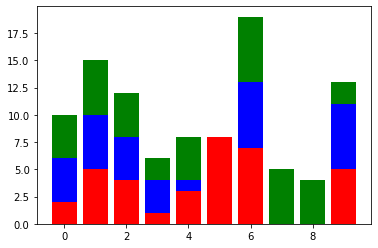

In [8]:
# Model parameters:
Ngroups=10
Npeople=100  
Tolerance=.5 # tolerable propotion of the opposite sex

# Initialization:
people = [Person(Ngroups) for i in range(Npeople)] # 初始設定每個人的性別、組別
Nhappy=0 # 滿意組內狀況人數

# Simulation:
while(Nhappy<Npeople): # Simulation stops when everyone is happy
    Nhappy=0 # recounting after a new move
    # Insert your codes here to make everyone happy:
    counts, proportions=party_stats(people) # size=group*sex
    # Plot new results:
    plot_party(counts)
    
    for i in range(10):
        majsex2 = 3
        # 三個人數一樣多
        if(proportions[i][0]==proportions[i][1] and proportions[i][0]==proportions[i][2]): majsex = 3
        # 有一個最多
        elif(max(proportions[i][0], proportions[i][1], proportions[i][2])==proportions[i][0]):
            majsex = 0
            # 還是兩個最多
            if(proportions[i][0]==proportions[i][1]): majsex2 = 1
            elif(proportions[i][0]==proportions[i][2]): majsex2 = 2
        elif(max(proportions[i][0], proportions[i][1], proportions[i][2])==proportions[i][1]):
            majsex = 1
            if(proportions[i][1]==proportions[i][2]): majsex2 = 2
        elif(max(proportions[i][0], proportions[i][1], proportions[i][2])==proportions[i][2]):
            majsex = 2
        
        if(majsex==3 and proportions[i][0]> Tolerance):
            for j in range(Npeople):
                if(people[j].group==i):
                    people[j].leave()
        elif(majsex != 3 and proportions[i][majsex]> Tolerance and proportions[i][majsex]!=1):
            for j in range(Npeople):
                if(people[j].sex != majsex and people[j].sex != majsex2 and people[j].group == i):
                    people[j].leave()
        else: Nhappy+=(counts[i][0]+counts[i][1]+counts[i][2])
counts, proportions=party_stats(people)
plot_party(counts)

##### Trial 2-4
Category num=3<br>
Tolerance=0.75

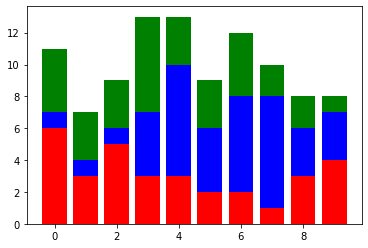

In [10]:
# Model parameters:
Ngroups=10
Npeople=100  
Tolerance=.75 # tolerable propotion of the opposite sex

# Initialization:
people = [Person(Ngroups) for i in range(Npeople)] # 初始設定每個人的性別、組別
Nhappy=0 # 滿意組內狀況人數

# Simulation:
while(Nhappy<Npeople): # Simulation stops when everyone is happy
    Nhappy=0 # recounting after a new move
    # Insert your codes here to make everyone happy:
    counts, proportions=party_stats(people) # size=group*sex
    # Plot new results:
    plot_party(counts)
    
    for i in range(10):
        majsex2 = 3
        # 三個人數一樣多
        if(proportions[i][0]==proportions[i][1] and proportions[i][0]==proportions[i][2]): majsex = 3
        # 有一個最多
        elif(max(proportions[i][0], proportions[i][1], proportions[i][2])==proportions[i][0]):
            majsex = 0
            # 還是兩個最多
            if(proportions[i][0]==proportions[i][1]): majsex2 = 1
            elif(proportions[i][0]==proportions[i][2]): majsex2 = 2
        elif(max(proportions[i][0], proportions[i][1], proportions[i][2])==proportions[i][1]):
            majsex = 1
            if(proportions[i][1]==proportions[i][2]): majsex2 = 2
        elif(max(proportions[i][0], proportions[i][1], proportions[i][2])==proportions[i][2]):
            majsex = 2
        
        if(majsex==3 and proportions[i][0]> Tolerance):
            for j in range(Npeople):
                if(people[j].group==i):
                    people[j].leave()
        elif(majsex != 3 and proportions[i][majsex]> Tolerance and proportions[i][majsex]!=1):
            for j in range(Npeople):
                if(people[j].sex != majsex and people[j].sex != majsex2 and people[j].group == i):
                    people[j].leave()
        else: Nhappy+=(counts[i][0]+counts[i][1]+counts[i][2])
counts, proportions=party_stats(people)
plot_party(counts)

**結果討論**:<br>
在第一個參數調整的試驗中我們有講到，因為「二元性別」的關係致使tolerance的大小成為使否會走向極端的關鍵，所以在第二個參數調整的試驗，將二元性別中加入第三性。其規則更改為，假若組內佔最多數的性別，其組內比例大於tolerance，具有其餘兩個比例佔比較小性別的人士就會離開該組；若是組內三個性別佔比相同就依照是否大於tolerance決定是要全部離開還是少數離開；如果最大佔比有兩組且大於tolerance，佔最少性別比的人將離開。

從試驗中可以觀察到，基本上在小於0.5的情況下，單一性別的組別還是佔多數，如果依據數學上的推論來說，其實在tolerance=0.333333的時候應該就會開始出現共容的組別(因為有三個性別的組內人數皆相同的可能)，但由於重複試驗的次數少，因此最後選定更高更容易觀察到共容的0.4作展示。在tolerance大於0.5時，單一性別的組數出線機率幾乎為0，觀察下來大致可以將三種性別的情況劃分為：

- 0 <= tolerance < 1/3 : 各組皆為單一性別
- 1/3 <= tolerance < 1/2 : 單一性別和共容組別皆有出現
- 1/2 <= tolerance : 幾乎為共容組別

---
#### 3. Ngroups & Npeople diff
##### Trial 3-1
Ngroups=100<br>
Npeople=10000<br>
Category num=2<br>
Tolerance=0.25

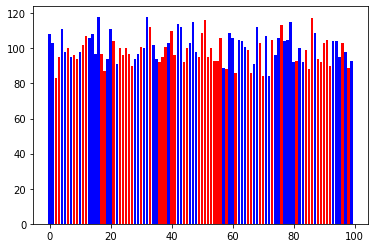

In [17]:
# Model parameters:
Ngroups=100
Npeople=10000  
Tolerance=.25 # tolerable propotion of the opposite sex

# Supporting functions:
class Person:
    def __init__(self, Ngroups):
        self.sex = random.randint(2) # 0=woman; 1=man
        self.Ngroups=Ngroups
        self.group = random.randint(Ngroups) # staying in which group?
        
    def leave(self):
        options=delete(arange(self.Ngroups),self.group) # except the current group
        self.group = int(random.choice(options,1)) # choosing a new group
    
def party_stats(people): # calculate the number of men & women in each group
    Npeople=len(people)
    sexes=[people[i].sex for i in range(Npeople)]
    groups=[people[i].group for i in range(Npeople)]
    counts=zeros((max(groups)+1,max(sexes)+1))
    # counts=[[女, 男]*10] (人數)
    proportions=counts.copy()
    for p in range(Npeople):
        counts[groups[p],sexes[p]]+=1
        # p在第幾組、什麼性別，該位置+1
    men_plus_women=sum(counts,1) # number of men and women in each group
    men_plus_women[men_plus_women==0]=inf # to avoid "dividing by zeros later
    proportions[:,0]=counts[:,0]/men_plus_women # proportion of women in each group
    proportions[:,1]=counts[:,1]/men_plus_women # proportion of men in each group
    # proportions=[[女, 男]*10] (比例)
    return counts, proportions# size=group*sex

def plot_party(counts):
    x=arange(100) # number of groups
    clf() # clear previous figure
    bar(x, counts[:,0], color = 'r') # women
    bar(x, counts[:,1], color = 'b', bottom = counts[:,0]) # men on top of women in the plot
    display(gcf()); clear_output(wait=True) # to allow dynamic plots
    
# Initialization:
people = [Person(Ngroups) for i in range(Npeople)] # assign each person to a group
# 初始設定每個人的性別、組別
Nhappy=0 # Number of happy people
# 滿意組內狀況人數

# Simulation:
while(Nhappy<Npeople): # Simulation stops when everyone is happy
    Nhappy=0 # recounting after a new move
    # Insert your codes here to make everyone happy:
    # people = [Person(Ngroups) for i in range(Npeople)] # !! Remove this line !!
    counts, proportions=party_stats(people) # size=group*sex
    # Plot new results:
    plot_party(counts)
    for i in range(100):
        if(proportions[i][0]>proportions[i][1]):
            majsex = 0
        else: majsex = 1
            
        if(proportions[i][majsex] > Tolerance and proportions[i][majsex]!=1):
            for j in range(Npeople):
                if(people[j].sex != majsex and people[j].group == i):
                    people[j].leave()
        else:
            Nhappy+=(counts[i][0]+counts[i][1])
counts, proportions=party_stats(people)
plot_party(counts)

##### Trial 3-2
Ngroups=100<br>
Npeople=10000<br>
Category num=2<br>
Tolerance=0.5

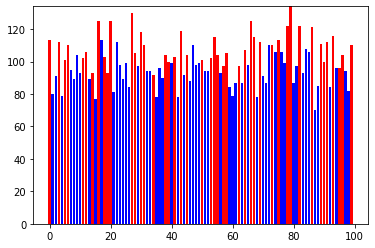

In [27]:
# Model parameters:
Ngroups=100
Npeople=10000  
Tolerance=.5 # tolerable propotion of the opposite sex

# Initialization:
people = [Person(Ngroups) for i in range(Npeople)] # 初始設定每個人的性別、組別
Nhappy=0 # 滿意組內狀況人數

# Simulation:
while(Nhappy<Npeople): # Simulation stops when everyone is happy
    Nhappy=0 # recounting after a new move
    counts, proportions=party_stats(people) # size=group*sex
    plot_party(counts)
    for i in range(100):
        if(proportions[i][0]>proportions[i][1]):
            majsex = 0
        else: majsex = 1
        if(proportions[i][majsex] > Tolerance and proportions[i][majsex]!=1):
            for j in range(Npeople):
                if(people[j].sex != majsex and people[j].group == i):
                    people[j].leave()
        else: Nhappy+=(counts[i][0]+counts[i][1])
counts, proportions=party_stats(people)
plot_party(counts)

##### Trial 3-3
Ngroups=100<br>
Npeople=10000<br>
Category num=2<br>
Tolerance=0.75

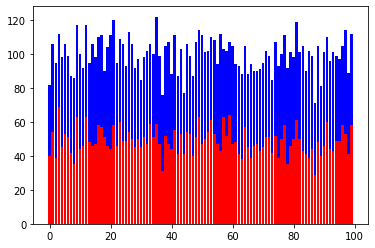

In [10]:
# Model parameters:
Ngroups=100
Npeople=10000  
Tolerance=.75 # tolerable propotion of the opposite sex

# Initialization:
people = [Person(Ngroups) for i in range(Npeople)] # 初始設定每個人的性別、組別
Nhappy=0 # 滿意組內狀況人數

# Simulation:
while(Nhappy<Npeople): # Simulation stops when everyone is happy
    Nhappy=0 # recounting after a new move
    counts, proportions=party_stats(people) # size=group*sex
    plot_party(counts)
    for i in range(100):
        if(proportions[i][0]>proportions[i][1]):
            majsex = 0
        else: majsex = 1
        if(proportions[i][majsex] > Tolerance and proportions[i][majsex]!=1):
            for j in range(Npeople):
                if(people[j].sex != majsex and people[j].group == i):
                    people[j].leave()
        else: Nhappy+=(counts[i][0]+counts[i][1])
counts, proportions=party_stats(people)
plot_party(counts)

##### Trial 3-4
Ngroups=100<br>
Npeople=10000<br>
Category num=3<br>
Tolerance=0.25

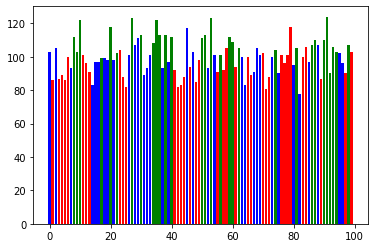

In [49]:
# Model parameters:
Ngroups=100
Npeople=10000  
Tolerance=.25 # tolerable propotion of the opposite sex

# Supporting functions:
class Person:
    def __init__(self, Ngroups):
        self.sex = random.randint(3) # 0=woman; 1=man; 2=others
        self.Ngroups=Ngroups
        self.group = random.randint(Ngroups) # staying in which group?
        
    def leave(self):
        options=delete(arange(self.Ngroups),self.group) # except the current group
        self.group = int(random.choice(options,1)) # choosing a new group
    
def party_stats(people): # calculate the number of men & women in each group
    Npeople=len(people)
    sexes=[people[i].sex for i in range(Npeople)]
    groups=[people[i].group for i in range(Npeople)]
    counts=zeros((max(groups)+1,max(sexes)+1))
    # counts=[[女, 男, 其他]*10] (人數)
    proportions=counts.copy()
    for p in range(Npeople):
        counts[groups[p],sexes[p]]+=1
        # p在第幾組、什麼性別，該位置+1
    all_people=sum(counts,1) # number of men and women in each group
    all_people[all_people==0]=inf # to avoid "dividing by zeros later
    proportions[:,0]=counts[:,0]/all_people # proportion of women in each group
    proportions[:,1]=counts[:,1]/all_people # proportion of men in each group
    proportions[:,2]=counts[:,2]/all_people # proportion of others in each group
    # proportions=[[女, 男, 其他]*10] (比例)
    return counts, proportions# size=group*sex

def plot_party(counts):
    x=arange(100) # number of groups
    clf() # clear previous figure
    bar(x, counts[:,0], color = 'r') # women
    bar(x, counts[:,1], color = 'b', bottom = counts[:,0]) # men on top of women in the plot
    bar(x, counts[:,2], color = 'g', bottom = counts[:,0]+counts[:,1]) # men on top of women in the plot
    display(gcf()); clear_output(wait=True) # to allow dynamic plots
    
# Initialization:
people = [Person(Ngroups) for i in range(Npeople)] # assign each person to a group
# 初始設定每個人的性別、組別
Nhappy=0 # Number of happy people
# 滿意組內狀況人數

# Simulation:
while(Nhappy<Npeople): # Simulation stops when everyone is happy
    Nhappy=0 # recounting after a new move
    # Insert your codes here to make everyone happy:
    counts, proportions=party_stats(people) # size=group*sex
    # Plot new results:
    plot_party(counts)
    
    for i in range(100):
        majsex2 = 3
        # 三個人數一樣多
        if(proportions[i][0]==proportions[i][1] and proportions[i][0]==proportions[i][2]): majsex = 3
        # 有一個最多
        elif(max(proportions[i][0], proportions[i][1], proportions[i][2])==proportions[i][0]):
            majsex = 0
            # 還是兩個最多
            if(proportions[i][0]==proportions[i][1]): majsex2 = 1
            elif(proportions[i][0]==proportions[i][2]): majsex2 = 2
        elif(max(proportions[i][0], proportions[i][1], proportions[i][2])==proportions[i][1]):
            majsex = 1
            if(proportions[i][1]==proportions[i][2]): majsex2 = 2
        elif(max(proportions[i][0], proportions[i][1], proportions[i][2])==proportions[i][2]):
            majsex = 2
        
        if(majsex==3 and proportions[i][0]> Tolerance):
            for j in range(Npeople):
                if(people[j].group==i):
                    people[j].leave()
        elif(majsex != 3 and proportions[i][majsex]> Tolerance and proportions[i][majsex]!=1):
            for j in range(Npeople):
                if(people[j].sex != majsex and people[j].sex != majsex2 and people[j].group == i):
                    people[j].leave()
        else: Nhappy+=(counts[i][0]+counts[i][1]+counts[i][2])
counts, proportions=party_stats(people)
plot_party(counts)

##### Trial 3-5
Ngroups=100<br>
Npeople=10000<br>
Category num=3<br>
Tolerance=0.4

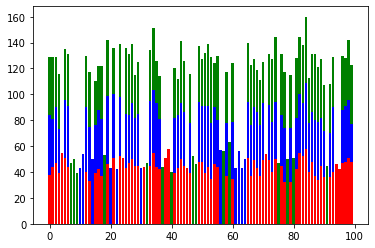

In [51]:
# Model parameters:
Ngroups=100
Npeople=10000  
Tolerance=.4 # tolerable propotion of the opposite sex

# Initialization:
people = [Person(Ngroups) for i in range(Npeople)] # 初始設定每個人的性別、組別
Nhappy=0 # 滿意組內狀況人數

# Simulation:
while(Nhappy<Npeople): # Simulation stops when everyone is happy
    Nhappy=0 # recounting after a new move
    # Insert your codes here to make everyone happy:
    counts, proportions=party_stats(people) # size=group*sex
    # Plot new results:
    plot_party(counts)
    
    for i in range(100):
        majsex2 = 3
        # 三個人數一樣多
        if(proportions[i][0]==proportions[i][1] and proportions[i][0]==proportions[i][2]): majsex = 3
        # 有一個最多
        elif(max(proportions[i][0], proportions[i][1], proportions[i][2])==proportions[i][0]):
            majsex = 0
            # 還是兩個最多
            if(proportions[i][0]==proportions[i][1]): majsex2 = 1
            elif(proportions[i][0]==proportions[i][2]): majsex2 = 2
        elif(max(proportions[i][0], proportions[i][1], proportions[i][2])==proportions[i][1]):
            majsex = 1
            if(proportions[i][1]==proportions[i][2]): majsex2 = 2
        elif(max(proportions[i][0], proportions[i][1], proportions[i][2])==proportions[i][2]):
            majsex = 2
        
        if(majsex==3 and proportions[i][0]> Tolerance):
            for j in range(Npeople):
                if(people[j].group==i):
                    people[j].leave()
        elif(majsex != 3 and proportions[i][majsex]> Tolerance and proportions[i][majsex]!=1):
            for j in range(Npeople):
                if(people[j].sex != majsex and people[j].sex != majsex2 and people[j].group == i):
                    people[j].leave()
        else: Nhappy+=(counts[i][0]+counts[i][1]+counts[i][2])
counts, proportions=party_stats(people)
plot_party(counts)

##### Trial 3-6
Ngroups=100<br>
Npeople=10000<br>
Category num=3<br>
Tolerance=0.5

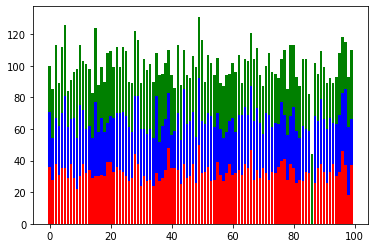

In [16]:
# Model parameters:
Ngroups=100
Npeople=10000  
Tolerance=.5 # tolerable propotion of the opposite sex

# Initialization:
people = [Person(Ngroups) for i in range(Npeople)] # 初始設定每個人的性別、組別
Nhappy=0 # 滿意組內狀況人數

# Simulation:
while(Nhappy<Npeople): # Simulation stops when everyone is happy
    Nhappy=0 # recounting after a new move
    # Insert your codes here to make everyone happy:
    counts, proportions=party_stats(people) # size=group*sex
    # Plot new results:
    plot_party(counts)
    
    for i in range(100):
        majsex2 = 3
        # 三個人數一樣多
        if(proportions[i][0]==proportions[i][1] and proportions[i][0]==proportions[i][2]): majsex = 3
        # 有一個最多
        elif(max(proportions[i][0], proportions[i][1], proportions[i][2])==proportions[i][0]):
            majsex = 0
            # 還是兩個最多
            if(proportions[i][0]==proportions[i][1]): majsex2 = 1
            elif(proportions[i][0]==proportions[i][2]): majsex2 = 2
        elif(max(proportions[i][0], proportions[i][1], proportions[i][2])==proportions[i][1]):
            majsex = 1
            if(proportions[i][1]==proportions[i][2]): majsex2 = 2
        elif(max(proportions[i][0], proportions[i][1], proportions[i][2])==proportions[i][2]):
            majsex = 2
        
        if(majsex==3 and proportions[i][0]> Tolerance):
            for j in range(Npeople):
                if(people[j].group==i):
                    people[j].leave()
        elif(majsex != 3 and proportions[i][majsex]> Tolerance and proportions[i][majsex]!=1):
            for j in range(Npeople):
                if(people[j].sex != majsex and people[j].sex != majsex2 and people[j].group == i):
                    people[j].leave()
        else: Nhappy+=(counts[i][0]+counts[i][1]+counts[i][2])
counts, proportions=party_stats(people)
plot_party(counts)

##### Trial 3-7
Ngroups=100<br>
Npeople=10000<br>
Category num=3<br>
Tolerance=0.75

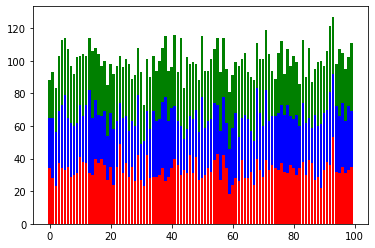

In [14]:
# Model parameters:
Ngroups=100
Npeople=10000  
Tolerance=.75 # tolerable propotion of the opposite sex

# Initialization:
people = [Person(Ngroups) for i in range(Npeople)] # 初始設定每個人的性別、組別
Nhappy=0 # 滿意組內狀況人數

# Simulation:
while(Nhappy<Npeople): # Simulation stops when everyone is happy
    Nhappy=0 # recounting after a new move
    # Insert your codes here to make everyone happy:
    counts, proportions=party_stats(people) # size=group*sex
    # Plot new results:
    plot_party(counts)
    
    for i in range(100):
        majsex2 = 3
        # 三個人數一樣多
        if(proportions[i][0]==proportions[i][1] and proportions[i][0]==proportions[i][2]): majsex = 3
        # 有一個最多
        elif(max(proportions[i][0], proportions[i][1], proportions[i][2])==proportions[i][0]):
            majsex = 0
            # 還是兩個最多
            if(proportions[i][0]==proportions[i][1]): majsex2 = 1
            elif(proportions[i][0]==proportions[i][2]): majsex2 = 2
        elif(max(proportions[i][0], proportions[i][1], proportions[i][2])==proportions[i][1]):
            majsex = 1
            if(proportions[i][1]==proportions[i][2]): majsex2 = 2
        elif(max(proportions[i][0], proportions[i][1], proportions[i][2])==proportions[i][2]):
            majsex = 2
        
        if(majsex==3 and proportions[i][0]> Tolerance):
            for j in range(Npeople):
                if(people[j].group==i):
                    people[j].leave()
        elif(majsex != 3 and proportions[i][majsex]> Tolerance and proportions[i][majsex]!=1):
            for j in range(Npeople):
                if(people[j].sex != majsex and people[j].sex != majsex2 and people[j].group == i):
                    people[j].leave()
        else: Nhappy+=(counts[i][0]+counts[i][1]+counts[i][2])
counts, proportions=party_stats(people)
plot_party(counts)

**結果討論**:<br>
第三個參數調整試驗為擴大組別數和人數，觀察在大數下七種嘗試的變化。在二元性別的狀況下其實差別不大，比較詫異的是在tolerance=0.5時這一百組全為單一性別，不過考量到要讓一組有大約一百人上下，兩種性別要均等其實是蠻困難的一件事，就算剛好一樣人數，仍有可能因為下一輪中來自其他組別的人而打亂五五分的局勢。三種性別的情況就比較有明顯差異了，在tolerance=0.4時共容和單一性別組別數量上看起來差不多，這與人數組數較小時單一性別組為主的狀況有很大的不同，其原因就如上述所說，因人數增加導致要維持單一性別組別更為困難；在tolerance=0.5時，單一性別組已經非常稀少了，在tolerance=0.75時完全沒有，這與人數組數少時有很大的差別。

此外還有一些其他發現，像是在大數和tolerance值大於$\frac{1}{n}$時，縱觀來看各組的性別比會趨近相同；在共容和單一性別組同時出現時，單一性別組中的人數會遠遠低於共容組的人數。

### 1.3 Discuss why the simulaiton leads to group polarization (1 point)

Write your answer here.
初始情況中設定tolerance為0.25，所以假設一組中的男性占了多數，且其組內比例大於25%，那麼組內的女性勢必會盡數散去其他組別。然而，在性別二元的情況下要成為「組內多數」，無論如何其比例一定大於50%，因此可以想見tolerance小於0.5的狀況下所有的模擬皆會為單一性別組。

如果按照我上方關於三種性別的設定來說，要維持全部組別皆為單一性別組，必要條件就是有n種性別，tolerance要設小於$\frac{1}{n}$。假若想在性別多元且tolerance大於$\frac{1}{n}$的情形下能盡可能地有單一性別組出現，那麼便需要降低人數組數。

## 2 Understand Shunting Equation (5 points)

$\displaystyle{\frac{dy}{dt}}=-Ay+(B-y)*E-(y-C)*I$

### 2.1 Find its equilibrium by analytically solving $dy/dt=0$ (1 point)

Write your answer here with [LaTex](https://www.sharelatex.com/learn/Mathematical_expressions) formula <br>
Set $\displaystyle{\frac{dy}{dt}}=0$ <br>
$$
\begin{aligned}
\displaystyle{\frac{dy}{dt}}&=-Ay+(B-y)*E-(y-C)*I\\ &= -(A+E+I)*y+(BE+CI)\\ &=0
\end{aligned}
$$
According to the above equation, we can get
$$
\begin{aligned}
-(A+E+I)*y+(BE+CI)&=0\\
(A+E+I)*y&=BE+CI\\
y&=\displaystyle{\frac{BE+CI}{A+E+I}}
\end{aligned}
$$
Therefore, $y=\displaystyle{\frac{BE+CI}{A+E+I}}$

### 2.2 Use Euler integration to verify your answer in 2.1 with your own (A, B, C, E, I) constants (2 points)
程式參考: https://pythonnumericalmethods.berkeley.edu/notebooks/chapter22.03-The-Euler-Method.html

Equilibrium: y = 0.1375


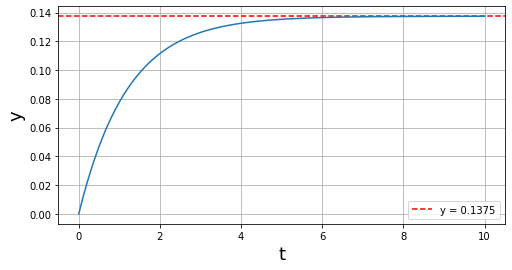

In [115]:
# My own constants (A, B, C, E, I)
A = 0.5
B = 0.4
C = 0.3
E = 0.2
I = 0.1

# Equilibrium
yEqui = (B*E+C*I)/(A+E+I)
print("Equilibrium: y =",round(yAns, 4))

# Define parameters
f = lambda t, y: -A*y+(B-y)*E-(y-C)*I # Shunting equation
dt = 0.1 # Step size
t = np.arange(0, 10 + dt, dt) # Numerical grid
y0 = 0 # Initial Condition

# Explicit Euler Method
y = np.zeros(len(t))
y[0] = y0

for i in range(0, len(t) - 1):
    y[i + 1] = y[i] + dt*f(t[i], y[i])

figure(figsize = (8, 4))
# Equilibrium line
axhline(yEqui, color='red', linestyle='--', label='y = '+str(round(yEqui, 4)))
plot(t, y)
legend()
xlabel('t', fontsize=18)
ylabel('y', fontsize=18)
grid()
show()

### 2.3 Combining math & if-then controls in numerical integrations (2 points)

Use Euler integration to plot $dy/dt=-y(t)+E$ where
$E=\begin{cases}
    1  &  \text{if } t<5\\
    0  &  \text{if } t>5
   \end{cases}$
for t=[0,10] & y(t=0)=0.

This is an example of time-varying rather than constant excitation.

#### Trial 1: $dy/dt = 0$, when $t = 5$

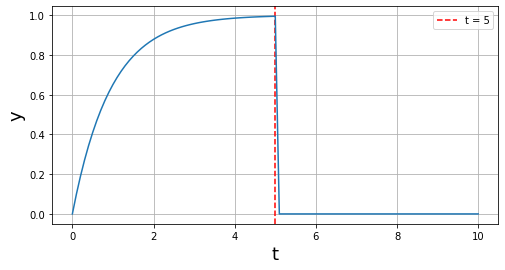

In [10]:
# Define parameters
f1 = lambda t, y: -y+1 # t<5
f2 = lambda t, y: -y # t>5
dt = 0.1 # Step size
t = np.arange(0, 10 + dt, dt) # Numerical grid
y0 = 0 # Initial Condition

# Explicit Euler Method
y = np.zeros(len(t))
y[0] = y0

for i in range(0, len(t) - 1):
    if(i<50): # 0.1s*50=5s
        y[i + 1] = y[i] + dt*f1(t[i], y[i])
    elif(i>50):
        y[i + 1] = y[i] + dt*f2(t[i], y[i])
    else: continue
figure(figsize = (8, 4))
axvline(5, color='red', linestyle='--', label='t = 5')
plot(t, y)
legend()
xlabel('t', fontsize=18)
ylabel('y', fontsize=18)
grid()
show()

**結果討論**：<br>
由於Euler Integration在$t$的$y$值是基於$t-1$時的$y$值加上$\Delta t*f(t)$，因此假若$t-1$時的$y$值消失了，那麼接下來的值也將會歸零。

---
#### Trial 2: $dy/dt=-y(t)+1$ when $t = 5$

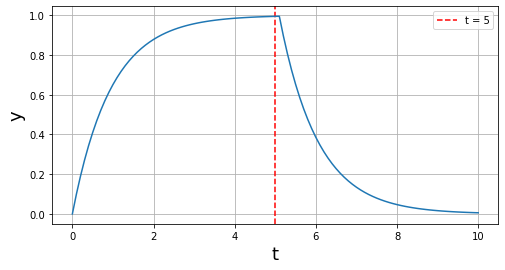

In [4]:
# Define parameters
f1 = lambda t, y: -y+1 # t<5
f2 = lambda t, y: -y # t>5
dt = 0.1 # Step size
t = np.arange(0, 10 + dt, dt) # Numerical grid
y0 = 0 # Initial Condition

# Explicit Euler Method
y = np.zeros(len(t))
y[0] = y0

for i in range(0, len(t) - 1):
    if(i<=50): # 0.1s*50=5s
        y[i + 1] = y[i] + dt*f1(t[i], y[i])
    elif(i>50):
        y[i + 1] = y[i] + dt*f2(t[i], y[i])
    # else: continue
figure(figsize = (8, 4))
axvline(5, color='red', linestyle='--', label='t = 5')
plot(t, y)
legend()
xlabel('t', fontsize=18)
ylabel('y', fontsize=18)
grid()
show()

**結果討論**：<br>
由於第5.1秒的$y$值是基於$y(5)+\Delta t*(-y(t)+1)$，而第5.2秒的$y$值是基於$y(5.1)+\Delta t*(-y(t))$，因此在第5.1秒時才開始有下降的趨勢。

---
#### Trial 3: $dy/dt=-y(t)$ when $t = 5$

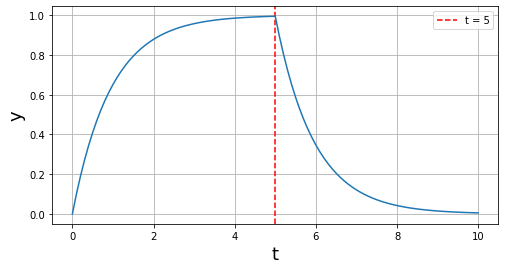

In [5]:
# Define parameters
f1 = lambda t, y: -y+1 # t<5
f2 = lambda t, y: -y # t>5
dt = 0.1 # Step size
t = np.arange(0, 10 + dt, dt) # Numerical grid
y0 = 0 # Initial Condition

# Explicit Euler Method
y = np.zeros(len(t))
y[0] = y0

for i in range(0, len(t) - 1):
    if(i<50): # 0.1s*50=5s
        y[i + 1] = y[i] + dt*f1(t[i], y[i])
    elif(i>=50):
        y[i + 1] = y[i] + dt*f2(t[i], y[i])
    # else: continue
figure(figsize = (8, 4))
axvline(5, color='red', linestyle='--', label='t = 5')
plot(t, y)
legend()
xlabel('t', fontsize=18)
ylabel('y', fontsize=18)
grid()
show()

**結果討論**：<br>
由於第5.1秒的$y$值是基於$y(5)+\Delta t*(-y(t))$，因此在第5.1秒時已經有下降的趨勢。

## Please submit the HTML version of your notebook to NTU COOL by 9/12(Mon)!